# 1. Cargar el CSV y ver las primeras filas
A continuación se cargan los datos Cancer_Data.csv y luego mostrar algunas filas para comprobar que todo quedó bien.

In [27]:
import pandas as pd

ruta_csv = "../data/Cancer_Data.csv"

df_raw = pd.read_csv(ruta_csv)

df_raw.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# 2. Ver la forma (dimensiones) del dataset
A continuación se verifica la cantidad de obsrvaciones (filas) y el número de varianles (columnas) que tiene el arhivo

In [28]:
df_raw.shape

(569, 33)

la base con la que vamso a trabajar cuenta con 569 registros y 33 columnas, donde dos corresponden a la vatiable ID, diagnostico y 31 variables numéricas de características del tumor.

# 3. Tipos de variables de cada columna
A continuación se verifica qué colimnas son numéricas y  cuáles son categóricas

In [29]:
df_raw.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [30]:
df_raw["diagnosis"].unique()


array(['M', 'B'], dtype=object)

Al revisar los tipos de datos del dataset mediante `df_raw.dtypes`, se observa que la columna **id** aparece como `int64`, lo cual es consistente con su función de identificador único para cada paciente. La columna **diagnosis** figura como tipo `object`, lo que indica que se trata de una variable categórica cuyos valores corresponden a *M* (maligno) y *B* (benigno); esta variable será la que utilicemos como objetivo en los modelos de clasificación. El resto de las columnas, como *radius_mean*, *texture_mean*, *perimeter_se*, *area_worst*, entre otras, se encuentran en formato `float64`, confirmando que representan medidas numéricas asociadas a las características físicas del tumor.

# 4. Verificar si hay duplicados y valores faltantes

## Valores duplicados

In [31]:
dr = df_raw.duplicated().sum()
idr = df_raw["id"].duplicated().sum()
print(f"total_datos_repetidos: {dr}\nid_repetidos: {idr}")

total_datos_repetidos: 0
id_repetidos: 0


## Valores faltantes

In [32]:
df_raw.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

La revisión de valores faltantes confirmó que ninguna variable, excepto Unnamed: 32, contiene valores faltantes. Esto indica que el dataset está completo y no requiere imputación. 

La columna Unnamed: 32 será eliminada en el preprocesamiento dado que no tiene  información, al idual que la colimna id porque no aporta información al modelo

In [33]:
df = df_raw.drop(columns=["id", "Unnamed: 32"], errors="ignore")
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# 5. Estadísticas descriptivas básicas de las variables numéricas
A continuación, se revisan los rangos, promedios y niveles de variabilidad de las variables numéricas, con el fin de detectar posibles valores extremos e identificar comportamientos atípicos en alguna de ellas. Este paso permite tener una primera impresión sobre la distribución de los datos y posibles problemas que será necesario atender en el preprocesamiento.

In [34]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Las estadísticas descriptivas muestran que las variables numéricas no contienen valores faltantes (todas presentan 569 observaciones). Las escalas entre variables difieren considerablemente, por lo que será necesario aplicar un método de estandarización antes de entrenar la Regresión Logística. 

# 6. Distribución de la variable objetivo diagnosis
A continuación, se analiza la distribución de la variable objetivo diagnosis, con el propósito de identificar si el conjunto de datos se encuentra balanceado o presenta desbalance entre las clases. Esto es importante porque influye directamente en el desempeño de los modelos de clasificación, particularmente en algoritmos como la Regresión Logística. Para este análisis se calcularán tanto las frecuencias absolutas como las frecuencias relativas de cada categoría.

## Frecuecnias abosilutas

In [35]:
df["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

## Frecuencia relativa

In [36]:
df["diagnosis"].value_counts(normalize=True) * 100

diagnosis
B    62.741652
M    37.258348
Name: proportion, dtype: float64

La variable objetivo diagnosis presenta un desbalance moderado: aproximadamente 63% de los casos corresponden a tumores benignos y 37% a malignos. Este desbalance implica que la métrica de precisión (accuracy) por sí sola podría ser engañosa, por lo que será necesario considerar métricas adicionales como precision, recall y F1-score. También será útil evaluar el uso de class_weight en la Regresión Logística.

# 7. Detección de valores atípicos (outliers) usando rango intercuartílico (IQR)


En este paso se calcula el rango intercuartílico (IQR) para cada una de las variables numéricas del dataset, con el fin de identificar posibles valores atípicos. Para ello, el código obtiene el primer cuartil (Q1) y el tercer cuartil (Q3) de cada columna; la diferencia entre ambos constituye el IQR, que representa la dispersión central de los datos. A partir de este rango se establecen límites inferior y superior utilizando la regla clásica de Tukey (Q1 − 1.5·IQR y Q3 + 1.5·IQR). Cualquier observación que quede por fuera de estos límites se considera potencialmente atípica y se contabiliza para cada variable.

Esto es importante porque permite detectar si alguna característica presenta valores que se alejan significativamente del comportamiento general, lo cual podría afectar el desempeño de los modelos o requerir transformaciones adicionales en el preprocesamiento.

In [37]:
# Seleccionar solo variables numéricas
num_cols = df.select_dtypes(include=["float64", "int64"]).columns

outliers = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    n_outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    outliers[col] = n_outliers

outliers


{'radius_mean': np.int64(14),
 'texture_mean': np.int64(7),
 'perimeter_mean': np.int64(13),
 'area_mean': np.int64(25),
 'smoothness_mean': np.int64(6),
 'compactness_mean': np.int64(16),
 'concavity_mean': np.int64(18),
 'concave points_mean': np.int64(10),
 'symmetry_mean': np.int64(15),
 'fractal_dimension_mean': np.int64(15),
 'radius_se': np.int64(38),
 'texture_se': np.int64(20),
 'perimeter_se': np.int64(38),
 'area_se': np.int64(65),
 'smoothness_se': np.int64(30),
 'compactness_se': np.int64(28),
 'concavity_se': np.int64(22),
 'concave points_se': np.int64(19),
 'symmetry_se': np.int64(27),
 'fractal_dimension_se': np.int64(28),
 'radius_worst': np.int64(17),
 'texture_worst': np.int64(5),
 'perimeter_worst': np.int64(15),
 'area_worst': np.int64(35),
 'smoothness_worst': np.int64(7),
 'compactness_worst': np.int64(16),
 'concavity_worst': np.int64(12),
 'concave points_worst': np.int64(0),
 'symmetry_worst': np.int64(23),
 'fractal_dimension_worst': np.int64(24)}

Usando el método del rango intercuartílico (IQR), se observó que varias variables presentan valores atípicos, especialmente area_se, radius_se y area_worst. Esto es esperado en datos biomédicos debido a la alta variabilidad natural entre tumores benignos y malignos.

Aunque los outliers no representan errores, su presencia confirma la necesidad de escalar las variables antes de entrenar modelos sensibles a la escala como la Regresión Logística. Random Forest, en cambio, es robusto a estos valores.

# 8. Analisis de correlación 
A continuación, se realiza un análisis de correlación entre las variables numéricas del dataset mediante un mapa de calor. Este paso permite identificar qué variables están altamente relacionadas entre sí, lo cual es útil para detectar posibles problemas de multicolinealidad, reconocer grupos de características que miden patrones similares y comprender mejor la estructura interna de los datos. Este análisis será especialmente relevante más adelante al interpretar la Regresión Logística y al entender cómo modelos como Random Forest determinan la importancia de cada variable.

In [40]:
# quedarte solo con las columnas numéricas
df_num = df.select_dtypes(include="number")

# matriz de correlación
corr = df_num.corr()
corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


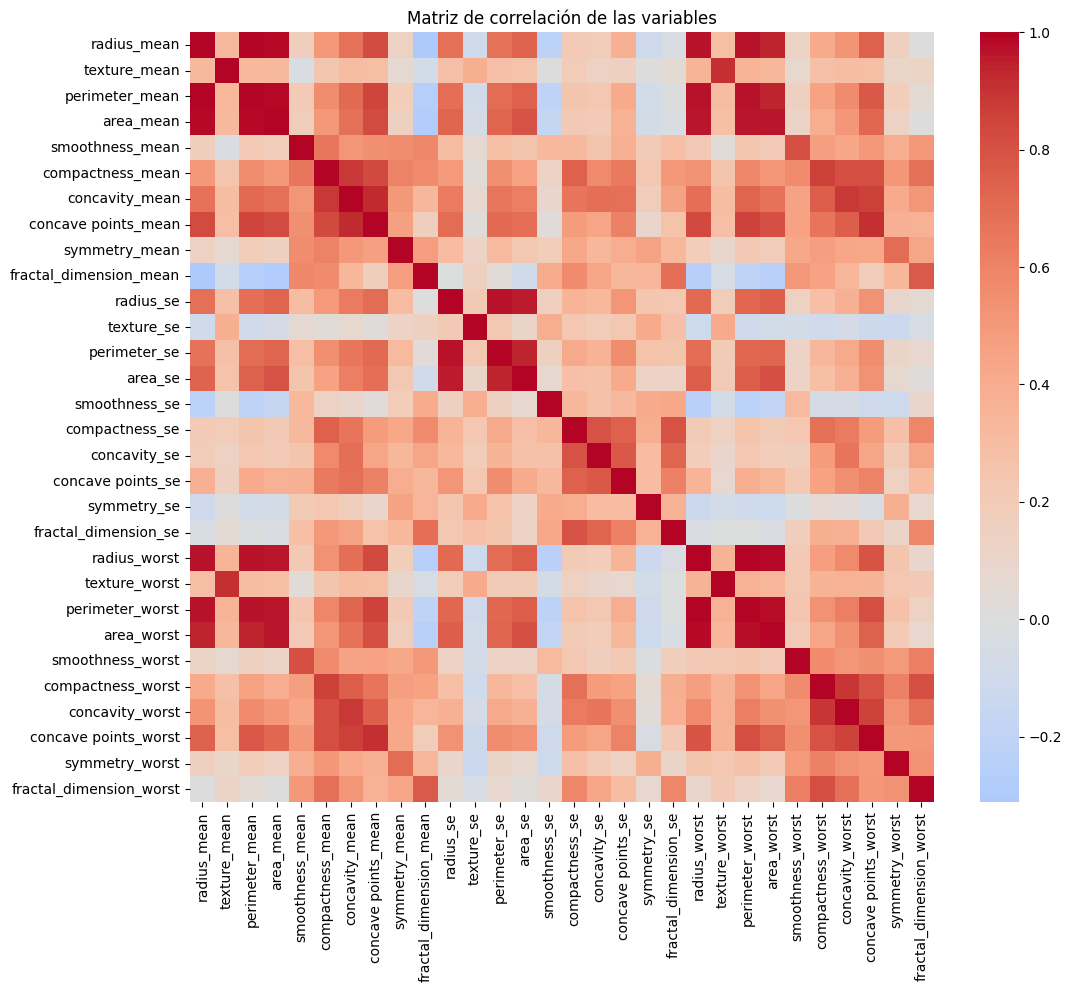

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Matriz de correlación de las variables")
plt.show()

La matriz de correlación permite identificar tres grupos principales de variables que presentan una correlación elevada entre sí. El primero agrupa características asociadas al tamaño del tumor, como radius, perimeter y area. El segundo reúne variables que describen la irregularidad del borde, entre ellas compactness, concavity y concave points. Finalmente, se observa un tercer grupo compuesto por variables relacionadas con la textura. Este patrón de correlaciones fuertes es común en datos biomédicos y evidencia la presencia de multicolinealidad. Aunque este fenómeno no representa un problema para modelos como Random Forest, sí debe considerarse en la Regresión Logística, por lo que la estandarización y el tratamiento adecuado de estas relaciones se vuelve un paso necesario antes del entrenamiento.

# Recomendaciones de preprocesamiento

Con todo el análisis exploratorio que realizamos, ya es posible definir qué pasos de preprocesamiento necesitamos aplicar en la siguiente fase. Primero, eliminaremos las columnas **id** y **Unnamed: 32**, ya que no aportan información útil al modelo (la segunda está completamente vacía). Luego, la variable **diagnosis** debe convertirse a formato numérico, usando 0 para los casos benignos (B) y 1 para los malignos (M), porque así podrán trabajar los modelos de clasificación.

También será necesario estandarizar las variables numéricas, ya que tienen escalas muy diferentes y varios valores atípicos. Este escalamiento es especialmente importante para la Regresión Logística; en cambio, Random Forest no lo requiere. En cuanto a los valores atípicos, no los vamos a eliminar: en datos biomédicos suelen reflejar variabilidad real y no errores.

Otro punto clave es dividir correctamente el dataset en entrenamiento y prueba antes de aplicar cualquier transformación, para evitar que se filtre información entre conjuntos. Finalmente, dado que la clase Benigna aparece con más frecuencia (aproximadamente un 63%), tendremos en cuenta el desbalance usando métricas más completas que la accuracy (como recall o F1-score) y, si es necesario, ajustando `class_weight="balanced"` en la Regresión Logística.

Estas decisiones se aplicarán en la Fase 2, donde construiremos el pipeline de preprocesamiento y comenzaremos con el entrenamiento de los modelos de clasificación.